## <center><u>**`Bagging and Random Forest Ensemble Algorithms`**</u></center>


Decision trees are a simple and powerful predictive modeling technique, but they suffer from high-variance.

This means that trees can get very different results given different training data.

A technique to make decision trees more robust and to achieve better performance is called bootstrap aggregation or bagging for short.

In this assignment, you will discover how to implement the bagging procedure with Python.

To know more about Bagging do refer the video below:
![image.png](attachment:image.png)

-------------------------

Here you will be using `3 different types of boosting` methods:

1. `Bagging classifier: an ensemble meta-estimator`
2. `RandomForest Classifier`
3. `ExtraTree Classifier`


#### **`PROBLEM STATEMENT: Credit Default Prediction`**

Build a model to predict whether a given customer defaults or not. Credit default is one of the most important problems in the banking and risk analytics industry. There are various attributes which can be used to predict default, such as demographic data (age, income, employment status, etc.), (credit) behavioural data (past loans, payment, number of times a credit payment has been delayed by the customer etc.).



# **`WATCH VIDEOS IN THE PORTAL`**

## **`Watch Video 1 : Bagging Intuition`**

### **`1. Data Understanding and Cleaning`**

<p style='text-align: right;'> 10 points</p>

In [17]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [18]:
# Reading the csv file and putting it into 'df' object.
df = pd.read_csv("credit-card-default.csv")

# print head
df.head()



,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [19]:
# Let's understand the type of columns
df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_0      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

In this case, we know that there are no major data quality issues, so we'll go ahead and build the model.

### **`2. Data Preparation and Model Building`**


<p style='text-align: right;'> 10 points</p>

In [20]:
# Importing test_train_split from sklearn library
from sklearn.model_selection import train_test_split




In [21]:
# Putting feature variable to X
X = df.drop("defaulted",axis=1)


# Putting response variable to y
y = df["defaulted"]



# Splitting the data into train and test with test size as 30% and random state as 101
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=101)



### **`3. Applying Bagging`**


##### 1. Bagging classifier: an ensemble meta-estimator

<p style='text-align: right;'> 20 points</p>


Bagging classifier can be called as an ensemble meta-estimator which is created by fitting multiple versions of base estimator, trained with modified training data set created using bagging sampling technique (data sampled using replacement) or otherwise. The nagging sampling technique can result in the training set consisting of duplicate dataset or unique data set. This sampling technique is also called as bootstrap aggregation. The final predictor (also called as bagging classifier) combines the predictions made by each estimator / classifier by voting (classification) or by averaging (regression). 

Bagging classifier helps in reducing the variance of individual estimators by introducing randomisation into the training stage of each of the estimators and making an ensemble out of all the estimators. 

Lets first check this using **simple Decision Tree** to build this model

In [22]:
# import StandardScaler, DecisionTreeClassifier and make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline

Make a pipeline Estimator to standardize X and use DecisionTreeClassifier with random_state=1 as model. 

Reference video below:
- Dataset used: https://drive.google.com/file/d/1zScKWqAnr2iilAxvm2Na2gLulbn-wsjj/view?usp=sharing

## **`Watch Video 2 : Pipeline`**

In [23]:
## Pipeline Estimator with StandardScaler and DecisionTreeClassifier with random_state as 1
pipeline = make_pipeline(StandardScaler(),DecisionTreeClassifier(random_state=1))

# fit model on training data
pipeline.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=1))])

In [24]:
# Model scores on test and training data
print("model test score: %.3f" %pipeline.score(X_test,y_test))
print("model training score: %.3f" %pipeline.score(X_train,y_train))





model test score: 0.728
model training score: 1.000


The model comes up with the above scores. Note that the model tends to overfit the data as the test score is 0.72 and training score is 1.00.

Here naturally reducing this overfitting issue is required. Lets do this using various bagging methods

#### **`1. Bagging classifier: an ensemble meta-estimator`**

Reference doc link: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html

Reference YouTube link below:
We will fit a bagging classifier using default hyperparameters and base estimator as pipeline built using Decision Tree Classifier. Note that you can further perform a Grid Search or Randomized search to get the most appropriate estimator.

## **`Watch Video 3: Scikit Learn Ensemble Learning`**
- dataset used : https://drive.google.com/file/d/17E6_SXbcb9fUkoo_0Az_Wc1Edas3uRpl/view?usp=sharing

In [25]:
# import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate the bagging classifier with base_estimator as pipeline and random_state=1
bgclassifier = BaggingClassifier(base_estimator=pipeline,random_state=1)

#fitting above model on training data
bgclassifier.fit(X_train,y_train)


## Model scores on test and training data
print("model test score: %.3f" %bgclassifier.score(X_test,y_test))
print("model training score: %.3f" %bgclassifier.score(X_train,y_train))


model test score: 0.810
model training score: 0.979


The model comes up with the following scores. Note that the model tends to overfit the data as the test score is 0.81 and training score is 0.98. However, the model will give better generalization performance than the model fit with Descision Tree alone.

Note: You can use any algorithm with bagging classifier 

#### **`Tuning BaggingClassifier`**
<p style='text-align: right;'> 5 points</p>

We will further perform a Grid Search or Randomized search to get the most appropriate estimator.

I would like to use GridSearchCV to find the best parameters for both BaggingClassifier and DecisionTreeClassifier (e.g. max_depth from DecisionTreeClassifier and max_samples & max_features from BaggingClassifier), what is the syntax for this?




In [30]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV

'''A dictionary with base_estimator__max_depth from 1 to 20 with step size as 5
A max_samples with [0.05, 0.1, 0.2, 0.5] and max_features form 1 to 20 with step size as 5'''

param_grid = {
    'base_estimator__max_depth':[1, 5, 10, 15, 20],
    'max_samples':[0.05, 0.1, 0.2, 0.5],
    'max_features':[1, 5, 10, 15, 20]
} 

# Instantiate gridsearch with BaggingClassifier with base estimator DecisionTreeClassifier and random_state=1
gs = GridSearchCV(estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=1),
                  param_grid=param_grid,
                  scoring='accuracy')

#fit grid search on training data
gs.fit(X_train,y_train)

GridSearchCV(estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                         random_state=1),
             param_grid={'base_estimator__max_depth': [1, 5, 10, 15, 20],
                         'max_features': [1, 5, 10, 15, 20],
                         'max_samples': [0.05, 0.1, 0.2, 0.5]},
             scoring='accuracy')

In [31]:
# print best paramaters selected by gridsearch

print("Optimal Hyper Parameter Combination: ",gs.best_params_)

#print mean accuracy score on final tuned  BaggingClassifier
print("Mean Cross Validated training accuracy score: ",gs.best_score_)

Optimal Hyper Parameter Combination:  {'base_estimator__max_depth': 5, 'max_features': 20, 'max_samples': 0.5}
Mean Cross Validated training accuracy score:  0.8177619047619048


Check our BaggingClassifier again on optimized parameters

In [32]:
# Instantiate the bagging classifier with optimized parameter by grid search and random_state=1
bgclassifier = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),max_features=20,max_samples=0.5,random_state=1)
                 
#fitting above model on training data
bgclassifier.fit(X_train,y_train)

## Model scores on test and training data
print("model test score: %.3f" %bgclassifier.score(X_test,y_test))
print("model training score: %.3f" %bgclassifier.score(X_train,y_train))

model test score: 0.824
model training score: 0.823


Wohooo! did you observe that we have succesfully eliminated problem of overfitting using bagging method and hyperparameter tuning it.


#### **`2. RandomForest Classifier`**

<p style='text-align: right;'> 20 points</p>


Reference doc: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Now lets check RandomForest algorithm for doing bagging.


Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction (see figure below).

![image.png](attachment:image.png)


Random forest is an extension of bagging that also randomly selects subsets of features used in each data sample.

Reference video below:

## **`Watch Video 4 : Random Forest`**

In [33]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters, but random_state as 1
rfc = RandomForestClassifier(random_state=1)

# fit model on training data
rfc.fit(X_train,y_train)



RandomForestClassifier(random_state=1)

In [34]:
# Making predictions
predictions = rfc.predict(X_test)


In [36]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

# Let's check the report of our default model
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.85      0.95      0.89      7058
           1       0.66      0.37      0.47      1942

    accuracy                           0.82      9000
   macro avg       0.75      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000



In [37]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

#Printing accuracy
print(accuracy_score(y_test,predictions))

[[6683  375]
 [1224  718]]
0.8223333333333334


So far so good, let's now look at the list of hyperparameters which we can tune to improve model performance.

#### **`Hyperparameter Tuning RF`**

<p style='text-align: right;'> 10 points</p>

The following hyperparameters are present in a random forest classifier. Note that most of these hypereparameters are actually of the decision trees that are in the forest.


- **n_estimators**: integer, optional (default=10): The number of trees in the forest.
- **criterion**: string, optional (default=”gini”)The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. Note: this parameter is tree-specific.
- **max_features** : int, float, string or None, optional (default=”auto”)The number of features to consider when looking for the best split:
    - If int, then consider max_features features at each split.
    - If float, then max_features is a percentage and int(max_features * n_features) features are considered at each split.
    - If “auto”, then max_features=sqrt(n_features).
    - If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).
    - If “log2”, then max_features=log2(n_features).
    - If None, then max_features=n_features.
    - Note: the search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than max_features features.
- **max_depth** : integer or None, optional (default=None)The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
- **min_samples_split** : int, float, optional (default=2)The minimum number of samples required to split an internal node:**
    - **If int, then consider min_samples_split as the minimum number.
    - **If float, then min_samples_split is a percentage and ceil(min_samples_split, n_samples) are the minimum number of samples for each split.
- **min_samples_leaf** : int, float, optional (default=1)The minimum number of samples required to be at a leaf node:**
    - **If int, then consider min_samples_leaf as the minimum number.**
    - **If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.**
- **min_weight_fraction_leaf** : float, optional (default=0.)The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.
- **max_leaf_nodes** : int or None, optional (default=None)Grow trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.
- **min_impurity_split** : float,Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.


### **`Tuning max_depth`**


Let's try to find the optimum values for ```max_depth``` and understand how the value of max_depth impacts the overall accuracy of the ensemble.


In [38]:
# import Kfold 
from sklearn.model_selection import KFold

# specify number of folds for k-fold CV which is 5
n_folds = 5 

# parameters to build the model on here max_depth with range(2, 20, 5)
parameters = {'max_depth':range(2, 20, 5)}

# instantiate the model Random Forest with random_state=1
rf = RandomForestClassifier(random_state=1)

# Instantiate GridSearchCVwith rf, parameter, cv and scoring as accuracy and return_train_score=True
rf = GridSearchCV(rf,parameters,cv=n_folds,scoring='accuracy',return_train_score=True)

# fit tree on training data
rf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': range(2, 20, 5)}, return_train_score=True,
             scoring='accuracy')

In [39]:
# scores of GridSearch CV
scores = rf.cv_results_

# convert scores into dataframe and print head
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.221684,0.127234,0.073905,0.014283,2,{'max_depth': 2},0.803095,0.803095,0.800476,0.796905,...,0.800905,0.002271,4,0.801190,0.799464,0.801667,0.803333,0.801786,0.801488,0.001242
1,5.976806,0.520273,0.088155,0.024088,7,{'max_depth': 7},0.815238,0.819762,0.818095,0.817857,...,0.817667,0.001455,1,0.831012,0.831071,0.831548,0.833333,0.834107,0.832214,0.001267
2,12.404434,2.075665,0.207515,0.050998,12,{'max_depth': 12},0.813095,0.819286,0.820476,0.814286,...,0.816905,0.002829,2,0.883929,0.886012,0.884345,0.887560,0.885298,0.885429,0.001290
3,13.749631,2.805243,0.213982,0.056976,17,{'max_depth': 17},0.812143,0.815952,0.820000,0.808571,...,0.815190,0.004326,3,0.926845,0.930536,0.931548,0.929524,0.927857,0.929262,0.001716


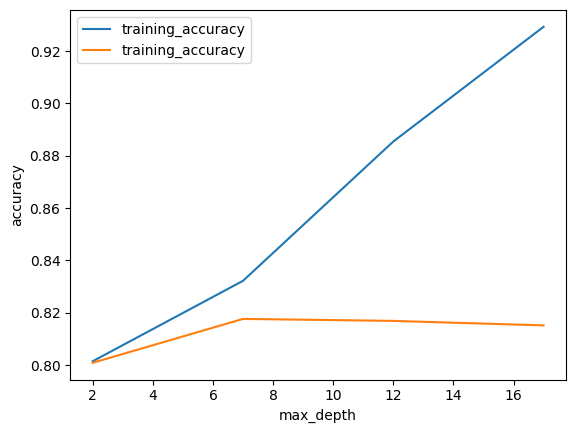

In [40]:
# plotting accuracies with max_depth
plt.figure()

# code below
plt.plot(scores['param_max_depth'],
         scores['mean_train_score'],
         label='training_accuracy')
plt.plot(scores['param_max_depth'],
         scores['mean_test_score'],
         label='training_accuracy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()
plt.show()


You can see that as we increase the value of max_depth, both train and test scores increase till a point, but after that test score starts to decrease. The ensemble tries to overfit as we increase the max_depth.

Thus, controlling the depth of the constituent trees will help reduce overfitting in the forest.

Let's try to find the optimum values for n_estimators and understand how the value of n_estimators impacts the overall accuracy. Notice that we'll specify an appropriately low value of max_depth, so that the trees do not overfit.
<br>

### **`Tuning n_estimators`**
Let's try to find the optimum values for n_estimators and understand how the value of n_estimators impacts the overall accuracy. Notice that we'll specify an appropriately low value of max_depth, so that the trees do not overfit.
<br>


In [41]:
# parameters to build the model on (here n_estimators with range(100, 1500, 400))
parameters = {'n_estimators':range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth as 4) and random_state as 1
rf = RandomForestClassifier(max_depth=4,random_state=1)

# Instantiate GridSearchCVwith rf, parameter, cv and scoring as accuracy and return_train_score as True
rf = GridSearchCV(rf,parameters,cv=n_folds,scoring='accuracy',return_train_score=True)

# fit tree on training data
rf.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=4, random_state=1),
             param_grid={'n_estimators': range(100, 1500, 400)},
             return_train_score=True, scoring='accuracy')

In [42]:
# scores of GridSearch CV
scores = rf.cv_results_

# convert scores into dataframe and print head
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.773976,0.295364,0.064905,0.013340,100,{'n_estimators': 100},0.812143,0.813333,0.812619,0.805000,...,0.810619,0.003021,1,0.811131,0.809643,0.812976,0.813214,0.813631,0.812119,0.001505
1,16.589613,1.014909,0.478219,0.179071,500,{'n_estimators': 500},0.812619,0.813571,0.810952,0.805476,...,0.810190,0.002952,2,0.811488,0.810417,0.812024,0.812560,0.812857,0.811869,0.000864
2,31.137276,3.156802,0.609980,0.162824,900,{'n_estimators': 900},0.811667,0.813810,0.811429,0.805238,...,0.810048,0.003021,3,0.811190,0.810536,0.811845,0.812798,0.812679,0.811810,0.000865
3,51.576416,7.551476,0.971978,0.367461,1300,{'n_estimators': 1300},0.811667,0.813571,0.811429,0.805000,...,0.809857,0.003103,4,0.811190,0.810238,0.811905,0.812798,0.812738,0.811774,0.000969


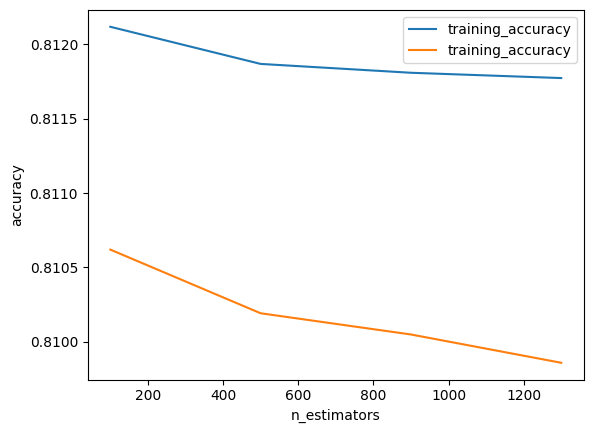

In [43]:
# plotting accuracies with max_depth
plt.figure()

# code below
plt.plot(scores['param_n_estimators'],
         scores['mean_train_score'],
         label='training_accuracy')
plt.plot(scores['param_n_estimators'],
         scores['mean_test_score'],
         label='training_accuracy')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.legend()
plt.show()

### **`Tuning max_features`**

Let's see how the model performance varies with ```max_features```, which is the maximum numbre of features considered for splitting at a node.

In [44]:

# parameters to build the model on max_features with [4, 8, 14, 20, 24]
parameters = {'max_features':[4, 8, 14, 20, 24]}

# instantiate the model (note we are specifying a max_depth as 4) and random_state as 1
rf = RandomForestClassifier(max_depth=4,random_state=1)

# Instantiate GridSearchCVwith rf, parameter, cv and scoring as accuracy and return_train_score as True
rf = GridSearchCV(rf,parameters,cv=n_folds,scoring='accuracy',return_train_score=True)

# fit tree on training data
rf.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=4, random_state=1),
             param_grid={'max_features': [4, 8, 14, 20, 24]},
             return_train_score=True, scoring='accuracy')

In [45]:
# scores of GridSearch CV
scores = rf.cv_results_

# convert scores into dataframe and print head
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.365208,0.468565,0.093762,0.029892,4,{'max_features': 4},0.812143,0.813333,0.812619,0.805000,...,0.810619,0.003021,5,0.811131,0.809643,0.812976,0.813214,0.813631,0.812119,0.001505
1,6.550800,0.512093,0.085793,0.014250,8,{'max_features': 8},0.817619,0.820952,0.820000,0.817381,...,0.818905,0.001377,1,0.821369,0.820179,0.821726,0.821369,0.821131,0.821155,0.000524
2,9.934637,1.039182,0.063348,0.014741,14,{'max_features': 14},0.817619,0.821429,0.817857,0.816429,...,0.818571,0.001737,4,0.822321,0.820952,0.821726,0.822321,0.821310,0.821726,0.000544
3,14.518519,0.572850,0.061858,0.013512,20,{'max_features': 20},0.817619,0.821905,0.819762,0.815476,...,0.818619,0.002148,3,0.822262,0.820774,0.821369,0.822798,0.821964,0.821833,0.000703
4,20.764047,4.382797,0.101603,0.043487,24,{'max_features': 24},0.818095,0.821667,0.819762,0.815000,...,0.818667,0.002190,2,0.822976,0.821250,0.821726,0.823214,0.822976,0.822429,0.000787


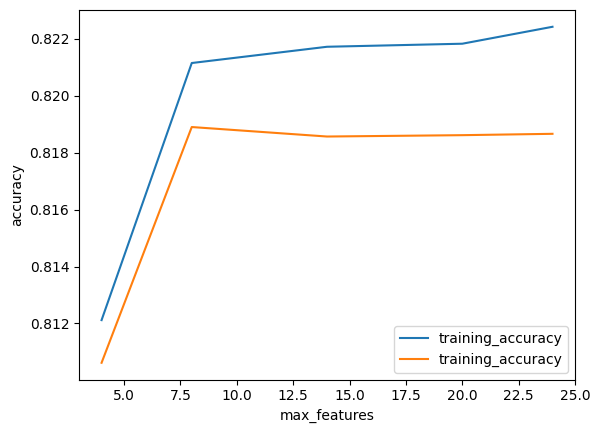

In [46]:
# plotting accuracies with max_features
plt.figure()
# code below
plt.plot(scores['param_max_features'],
         scores['mean_train_score'],
         label='training_accuracy')
plt.plot(scores['param_max_features'],
         scores['mean_test_score'],
         label='training_accuracy')
plt.xlabel('max_features')
plt.ylabel('accuracy')
plt.legend()
plt.show()

Apparently, the training and test scores *both* seem to increase as we increase max_features, and the model doesn't seem to overfit more with increasing max_features. Think about why that might be the case.

### **`Tuning min_samples_leaf`**

The hyperparameter **min_samples_leaf** is the minimum number of samples required to be at a leaf node:
- If int, then consider min_samples_leaf as the minimum number.
- If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

Let's now check the optimum value for min samples leaf in our case.

In [47]:

# parameters to build the model on min_samples_leaf of range(100, 400, 50)
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model (not specifying any max_depth) and random_state as 1
rf = RandomForestClassifier(random_state=1)

# Instantiate GridSearchCVwith rf, parameter, cv and scoring as accuracy and return_train_score as True
rf = GridSearchCV(rf,parameters,cv=n_folds,scoring='accuracy',return_train_score=True)

# fit tree on training data
rf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'min_samples_leaf': range(100, 400, 50)},
             return_train_score=True, scoring='accuracy')

In [48]:
# scores of GridSearch CV
scores = rf.cv_results_

# convert scores into dataframe and print head
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,7.577965,1.631668,0.119248,0.036992,100,{'min_samples_leaf': 100},0.815238,0.817857,0.815238,0.811667,...,0.814286,0.002433,1,0.817679,0.816012,0.816964,0.817619,0.818333,0.817321,0.000785
1,5.322790,0.243575,0.100991,0.028898,150,{'min_samples_leaf': 150},0.812381,0.814524,0.812381,0.808095,...,0.811095,0.002571,2,0.810952,0.812262,0.812500,0.814702,0.812560,0.812595,0.001205
2,4.508277,0.214657,0.079336,0.024079,200,{'min_samples_leaf': 200},0.810952,0.811429,0.811190,0.805476,...,0.809429,0.002316,3,0.808810,0.809821,0.809583,0.811131,0.811845,0.810238,0.001098
3,4.486366,0.431347,0.085444,0.018041,250,{'min_samples_leaf': 250},0.810952,0.811429,0.809762,0.803571,...,0.808524,0.002933,4,0.808631,0.808155,0.810298,0.810298,0.810714,0.809619,0.001024
4,4.376240,0.478751,0.099004,0.020596,300,{'min_samples_leaf': 300},0.809286,0.809524,0.808810,0.804762,...,0.807476,0.002133,5,0.807798,0.806429,0.808750,0.808988,0.808869,0.808167,0.000966


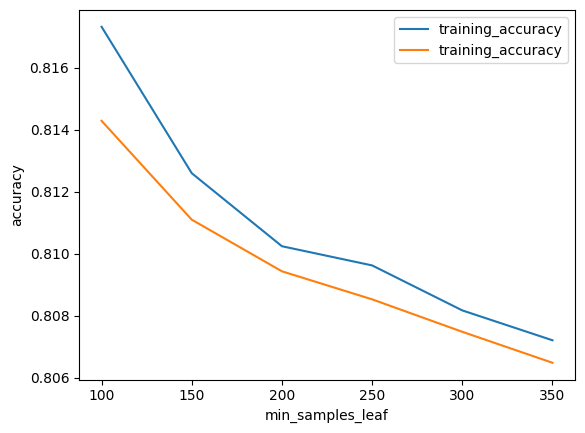

In [49]:
plt.figure()
# code below
plt.plot(scores['param_min_samples_leaf'],
         scores['mean_train_score'],
         label='training_accuracy')
plt.plot(scores['param_min_samples_leaf'],
         scores['mean_test_score'],
         label='training_accuracy')
plt.xlabel('min_samples_leaf')
plt.ylabel('accuracy')
plt.legend()
plt.show()

You can see that the model starts of overfit as you decrease the value of min_samples_leaf. 

### **`Tuning min_samples_split`**

Let's now look at the performance of the ensemble as we vary min_samples_split.




In [50]:


# parameters to build the model on (min_samples_split with range(200, 500, 50))
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model with random_state as 1
rf = rf = RandomForestClassifier(random_state=1)

# Instantiate GridSearchCVwith rf, parameter, cv and scoring as accuracy and return_train_score as True
rf = GridSearchCV(rf,parameters,cv=n_folds,scoring='accuracy',return_train_score=True)

#fitting model on training data
rf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'min_samples_split': range(200, 500, 50)},
             return_train_score=True, scoring='accuracy')

In [52]:
# scores of GridSearch CV
scores = rf.cv_results_

# convert scores into dataframe and print head
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,9.271097,0.642530,0.101746,0.020486,200,{'min_samples_split': 200},0.818571,0.820714,0.820714,0.817381,...,0.819190,0.001318,1,0.824286,0.823333,0.823274,0.824048,0.823988,0.823786,0.000407
1,9.148102,0.714636,0.135099,0.057815,250,{'min_samples_split': 250},0.818810,0.821667,0.820000,0.816905,...,0.819143,0.001605,2,0.822321,0.821607,0.822976,0.822976,0.823274,0.822631,0.000599
2,8.586791,0.907452,0.123648,0.035817,300,{'min_samples_split': 300},0.817381,0.821667,0.822143,0.816667,...,0.818714,0.002662,3,0.821667,0.821131,0.821726,0.821964,0.822679,0.821833,0.000503
3,8.438388,0.246914,0.110880,0.024255,350,{'min_samples_split': 350},0.817857,0.821429,0.820714,0.815714,...,0.818190,0.002522,6,0.820119,0.820833,0.820655,0.822440,0.821726,0.821155,0.000825
4,7.950513,0.458337,0.118118,0.029993,400,{'min_samples_split': 400},0.816905,0.820476,0.820952,0.815952,...,0.818381,0.001983,4,0.819762,0.819881,0.820298,0.820476,0.821071,0.820298,0.000467


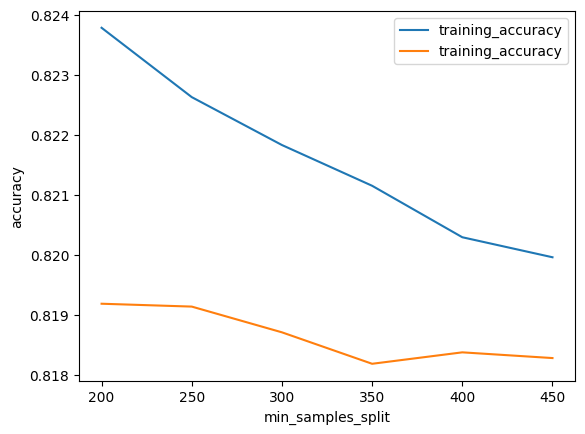

In [53]:
# plotting accuracies with min_samples_split
plt.figure()
# code below
plt.plot(scores['param_min_samples_split'],
         scores['mean_train_score'],
         label='training_accuracy')
plt.plot(scores['param_min_samples_split'],
         scores['mean_test_score'],
         label='training_accuracy')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.legend()
plt.show()

#### **`Random Search to Find Optimal Hyperparameters`**

We can now find the optimal hyperparameters using RandomizedSearchCV. 

with following  parameter values: 

`'max_depth': [4,8,10],
'min_samples_leaf': range(100, 400, 200),
'min_samples_split': range(200, 500, 200),
'n_estimators': [100,200, 300], 
'max_features': [5, 10]`

Note : here we are avoiding grid search because using it your system might crash, whereas RandomizedSearchCV is fater than grid search  ;)

In [67]:
# import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth':[4,8,10],
    'max_features': [5,10],
    'min_samples_leaf': range(100,400,200),
    'min_samples_split': range(200,500,200),
    'n_estimators': [100,200,300],
    
}

# Create a based model (i.e RF) with random_state as 1
rf = RandomForestClassifier(random_state=1)

# Instantiate the radom search model with estimator, param_grid, and random_state as 1
rs = RandomizedSearchCV(rf,param_grid,random_state=1)

# Fit the grid search to the data
rs.fit(X_train,y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=1),
                   param_distributions={'max_depth': [4, 8, 10],
                                        'max_features': [5, 10],
                                        'min_samples_leaf': range(100, 400, 200),
                                        'min_samples_split': range(200, 500, 200),
                                        'n_estimators': [100, 200, 300]},
                   random_state=1)

In [68]:
# printing the optimal accuracy score and hyperparameters
print("we get accuracy of ",rs.best_score_,'using',rs.best_params_)

we get accuracy of  0.8179047619047619 using {'n_estimators': 100, 'min_samples_split': 400, 'min_samples_leaf': 100, 'max_features': 10, 'max_depth': 8}


**Fitting the final model with the best parameters obtained from grid search.**

In [73]:
# Instantiate RF model with the best hyperparameters along with random_state as 1
rfc = RandomForestClassifier(max_depth=8,
                            max_features=10,
                            min_samples_leaf=100,
                            min_samples_split=400,
                            n_estimators=100,random_state=1)

In [74]:
# fit rfc on training data
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, max_features=10, min_samples_leaf=100,
                       min_samples_split=400, random_state=1)

In [75]:
# predict
predictions = rfc.predict(X_test)

In [76]:
# evaluation metrics using classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      7058
           1       0.69      0.36      0.47      1942

    accuracy                           0.83      9000
   macro avg       0.77      0.66      0.68      9000
weighted avg       0.81      0.83      0.80      9000



In [77]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

#Printing accuracy
print(accuracy_score(y_test,predictions))


[[6748  310]
 [1249  693]]
0.8267777777777777


Oh yeah ! after hyper parameter tuning Random forest accuracy is improved.

### **`3. Extra Trees ALgorithm`**

<p style='text-align: right;'> 20 points</p>

Reference doc: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html

 
Extra Trees and Random Forest are two very similar ensemble methods
The two ensembles have a lot in common. Both of them are composed of a large number of decision trees. The main difference between descision tree , random Forest and Extra trees are shown below:


![image.png](attachment:image.png)



Unlike bagging and random forest that develop each decision tree from a bootstrap sample of the training dataset, the Extra Trees algorithm fits each decision tree on the whole training dataset.

Like random forest, the Extra Trees algorithm will randomly sample the features at each split point of a decision tree. Unlike random forest, which uses a greedy algorithm to select an optimal split point, the Extra Trees algorithm selects a split point at random.

Reference video below:

## **`Watch Video 5 : Extra Trees`**

In [78]:
# import ExtraTreesClassifier 
from sklearn.ensemble import ExtraTreesClassifier

#Instantiate ExtraTreesClassifier with default parameters except random_state as 1
et = ExtraTreesClassifier(random_state=1)

#fitting model on training data
et.fit(X_train,y_train)

ExtraTreesClassifier(random_state=1)

In [79]:
# Making predictions
predictions = et.predict(X_test)

In [80]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7058
           1       0.62      0.36      0.45      1942

    accuracy                           0.81      9000
   macro avg       0.73      0.65      0.67      9000
weighted avg       0.79      0.81      0.79      9000



In [81]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[6629  429]
 [1248  694]]


In [82]:
#printing accuracy_score
print(accuracy_score(y_test,predictions))

0.8136666666666666


cool! so we got 81 % accuracy here. We can even try hyperparameter tuning here in order to improve the result. So lets Tune the mode


##### Random Search to Find Optimal Hyperparameters

<p style='text-align: right;'> 5 points</p>

Reference doc: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html


We can now find the optimal hyperparameters using GridSearchCV.

## **`Watch video 6:  Hyperparameter Tuning using Randomized Search CV`**
- dataset used: https://drive.google.com/file/d/1tvkIwEbaXZPjDj6yThwweRfikkNdqpnQ/view?usp=sharing

In [83]:
# Create the parameter grid similar to random forest

param_grid= {
    'max_depth':[4,8,10],
    'max_features': [5,10],
    'min_samples_leaf': range(100,400,200),
    'min_samples_split': range(200,500,200),
    'n_estimators': [100,200,300],
}

# Instantiate RandomizedSearchCV with et , param_grid and random state=1

rs = RandomizedSearchCV(et,param_grid,random_state=1)

# Fit the random search to the training data
rs.fit(X_train,y_train)

# printing the optimal accuracy score and hyperparameters
print("we get accuracy of ",rs.best_score_,'using',rs.best_params_)

we get accuracy of  0.8113333333333334 using {'n_estimators': 100, 'min_samples_split': 400, 'min_samples_leaf': 100, 'max_features': 10, 'max_depth': 8}


Now lets try using above chosen best parameters into extra trees and tune it.

In [84]:

#Instantiate ExtraTreesClassifier with default parameters
et = ExtraTreesClassifier(max_depth=8,
                            max_features=10,
                            min_samples_leaf=100,
                            min_samples_split=400,
                            n_estimators=100,random_state=1)
#fitting model on training data
et.fit(X_train,y_train)

ExtraTreesClassifier(max_depth=8, max_features=10, min_samples_leaf=100,
                     min_samples_split=400, random_state=1)

In [85]:
# Making predictions
predictions = et.predict(X_test)


In [86]:
print(accuracy_score(y_test,predictions))

0.8191111111111111


`Note: We have used  random_state as 1 in all algorithms, in order to avoid change in solution on repeated code execution`

Well here even after doing hyperparameter tuning, you can see that there is not much improvement on the model performance. 

Now you have seen ensemble bootstrap aggregation using 3 different methods, namely bagging classifier, Random Forest and Extra tree Regressor

Can you tell for our problem statement of Credit Default Prediction which ensemble method worked best here . Please do comment below:
    

In [ ]:
#here 


---------------------------------

# Fantastic:) Congratulations! you have completed the Ensemble: Bagging assignment. 

--------------------------------

# FeedBack
We hope you’ve enjoyed this course so far. We’re committed to help you use "AI for All" course to its full potential, so that you have a great learning experience. And that’s why we need your help in form of a feedback here.

Please fill this feedback form  https://zfrmz.in/MtRG5oWXBdesm6rmSM7N